### 結果の可視化

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import load_model
from train_and_save import load_data

mu_path="./1539513731mu/model_epoch.08-los0.0025.h5"
var_path="./1539514907var/model_epoch.02-los0.0000.h5"

Using TensorFlow backend.


In [2]:
mu_predictor = load_model(mu_path)
var_predictor = load_model(var_path)
X_train, X_test, y_train, y_test = load_data()

loading the data...
X train (126057, 192, 1)
X test (14007, 192, 1)
y train (126057, 1)
y test (14007, 1)


### 二乗誤差系列の可視化

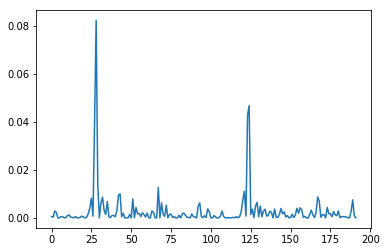

In [3]:
#二乗誤差系列
temp=mu_predictor.predict(X_train[:1000])
err_var=np.square(temp-y_train[:1000])
plt.plot(err_var[6*96:6*96+192]);

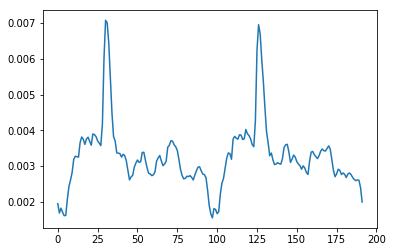

In [4]:
#学習した二乗誤差系列
var = var_predictor.predict(X_train[:1000])
plt.plot(var[6*96:6*96+192])

### 一連の推論

In [5]:
mu = mu_predictor.predict(X_test)
sigma = var_predictor.predict(X_test) #ここではまだσ^2
sigma = np.sqrt(sigma)

upper = mu+2*sigma
lower = mu-2*sigma
upper.shape, lower.shape

((14007, 1), (14007, 1))

In [6]:
def show_interval(start,width=192):
    plt.figure(figsize=(8,6))
    plt.plot(mu[start:start+width], color="g", alpha=0.3)
    #plt.plot(upper[:192,0])
    plt.fill_between(range(width),upper[start:start+width,0],lower[start:start+width,0],color="green",alpha=0.2)
    plt.plot(y_test[start:start+width])
    plt.show()
def show_sigma(start,width=192):
    plt.figure(figsize=(8,6))
    plt.plot(sigma[start:start+width],color="g")
#     plt.plot(0.06*y_test[start:start+width]+0.06)
    plt.show()

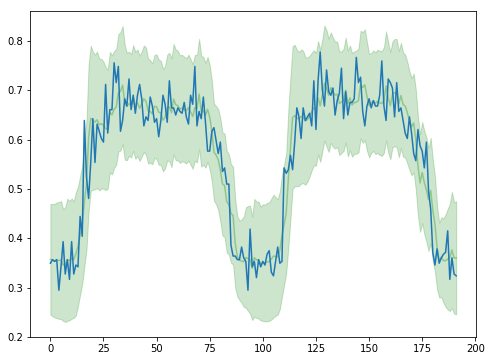

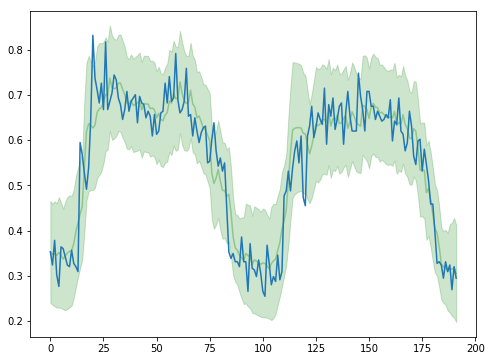

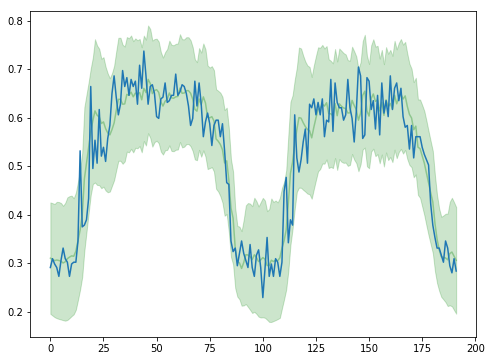

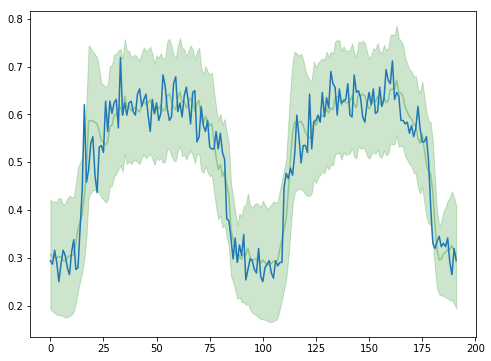

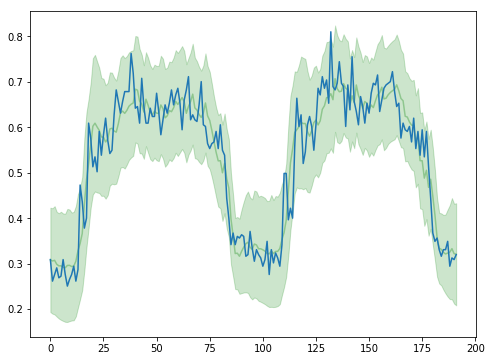

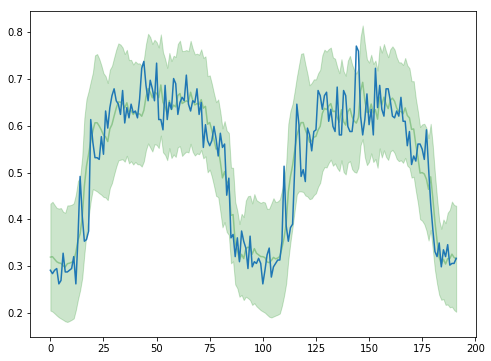

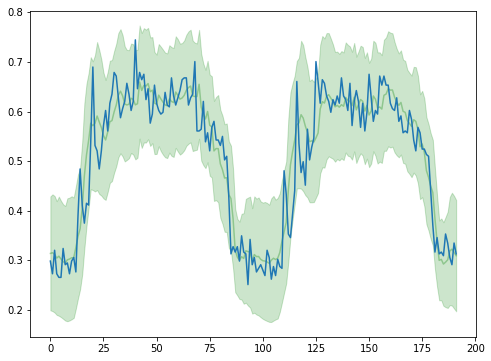

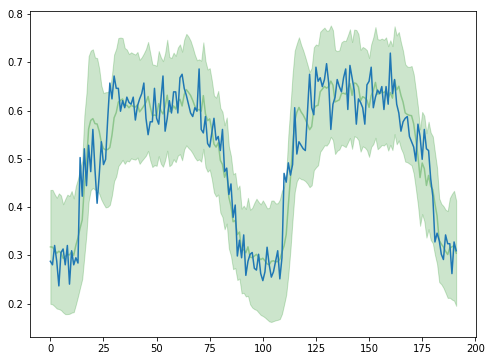

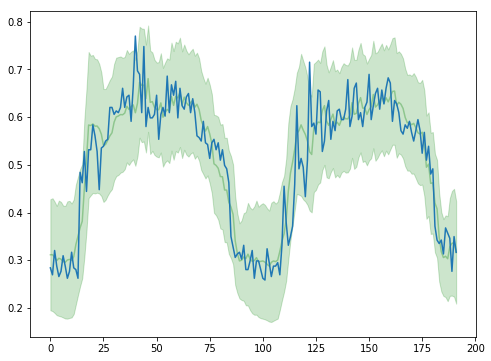

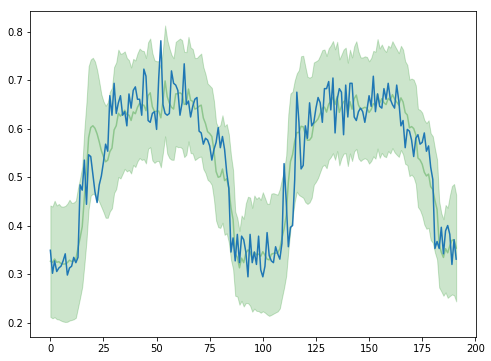

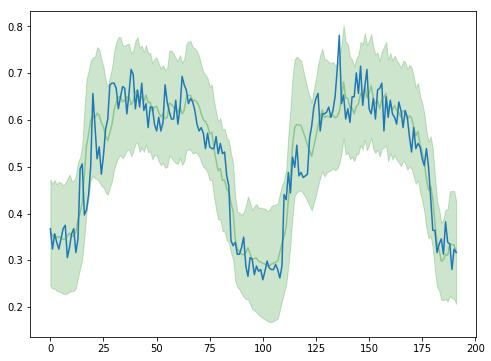

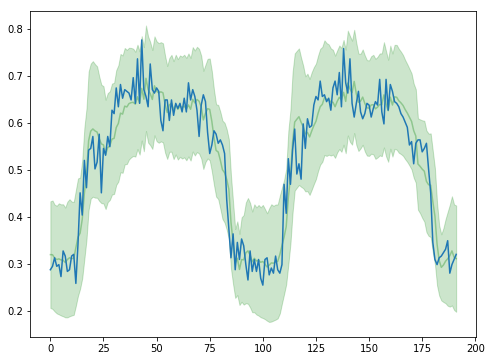

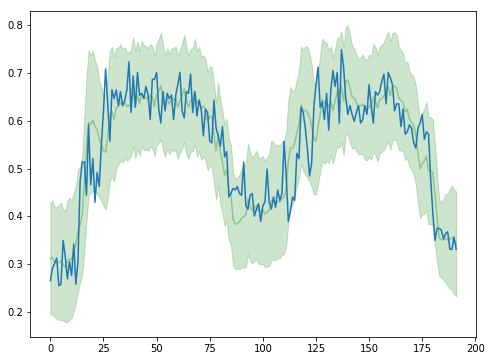

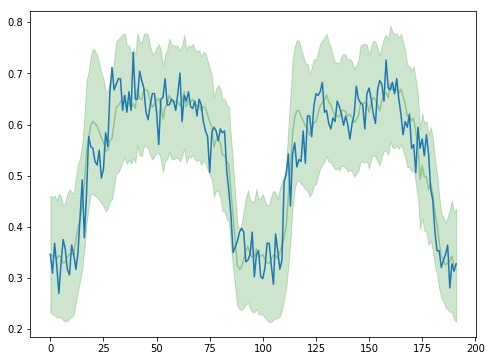

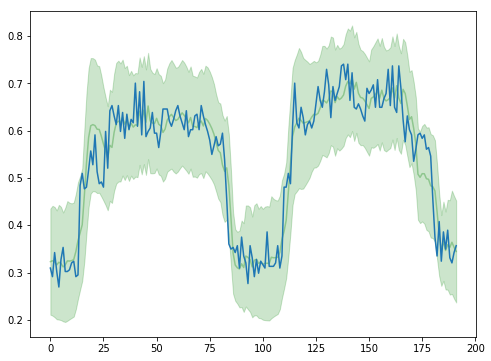

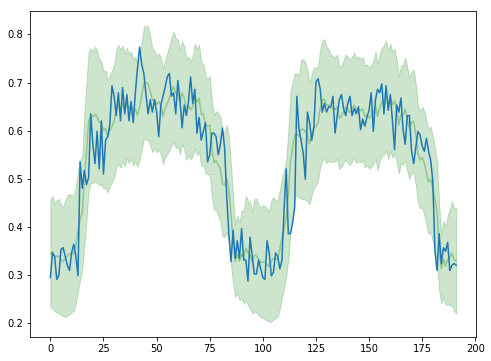

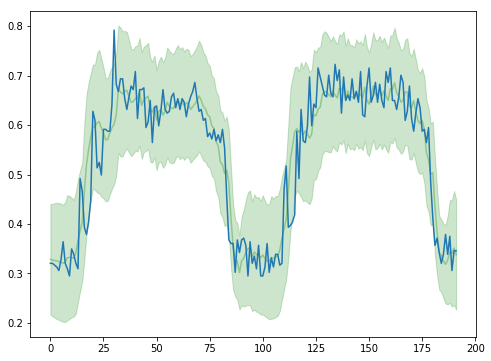

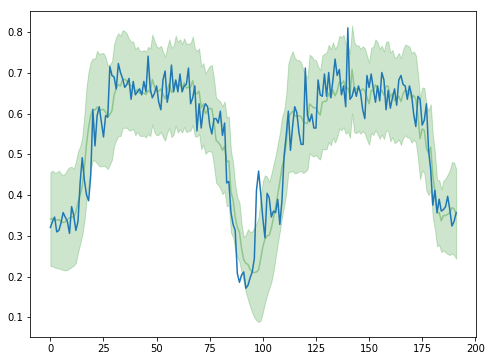

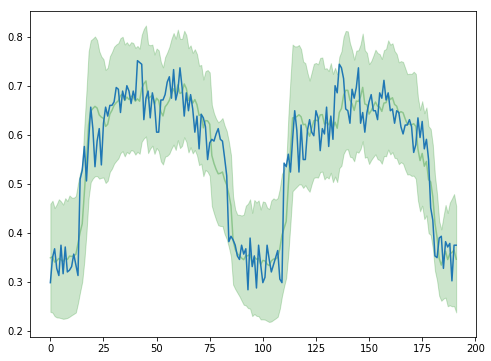

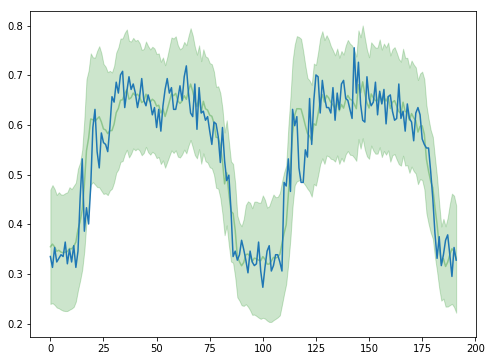

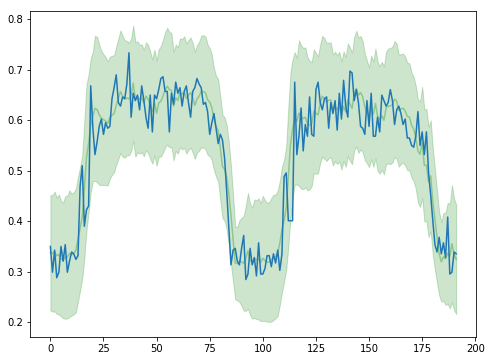

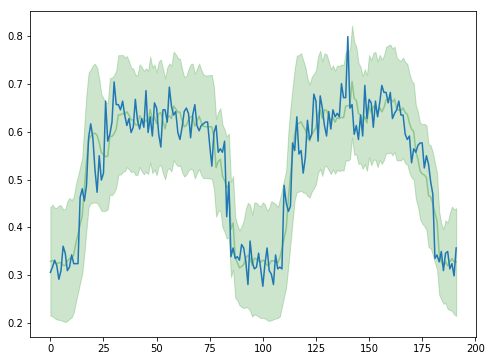

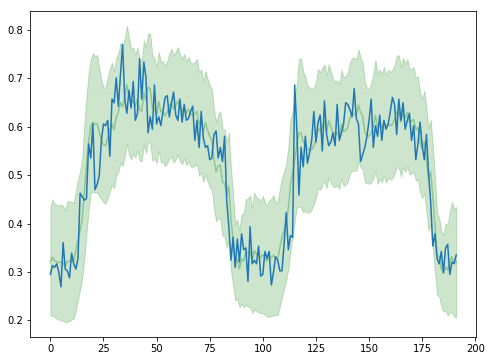

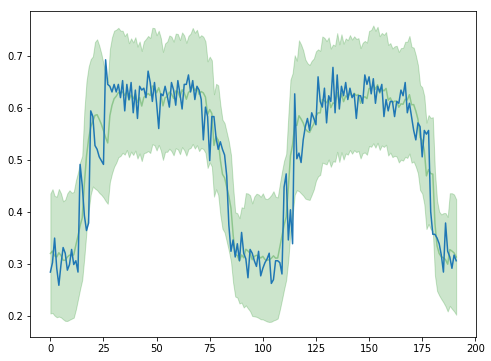

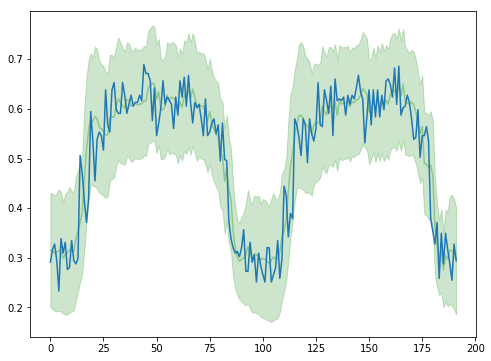

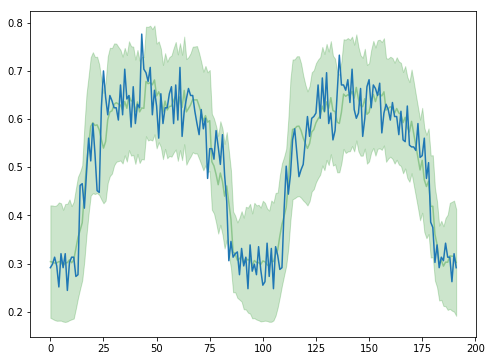

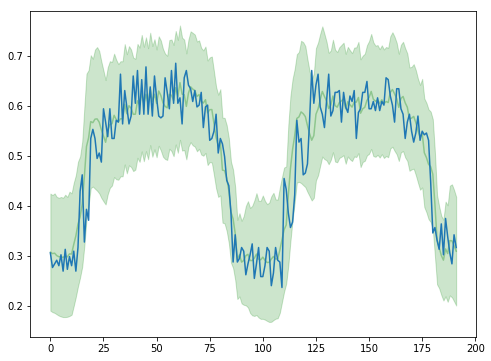

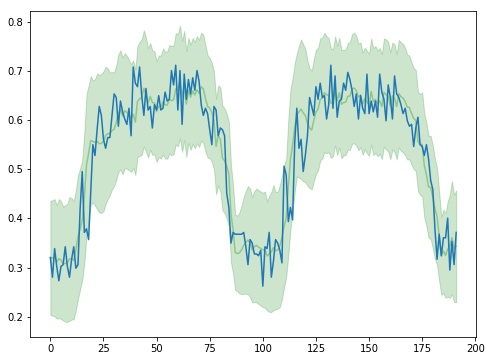

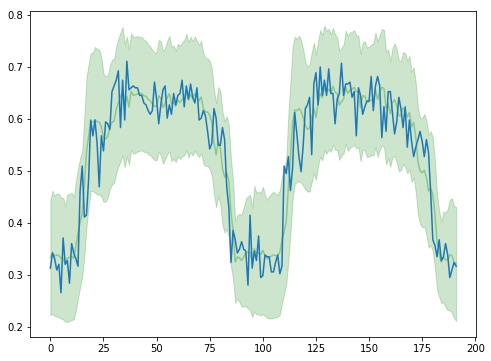

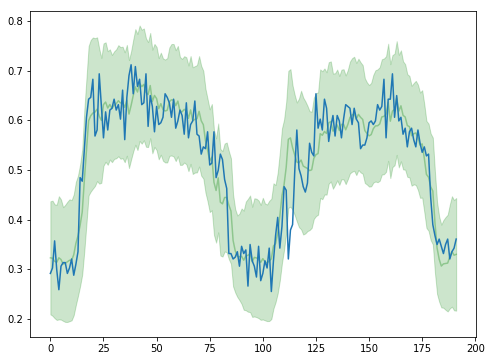

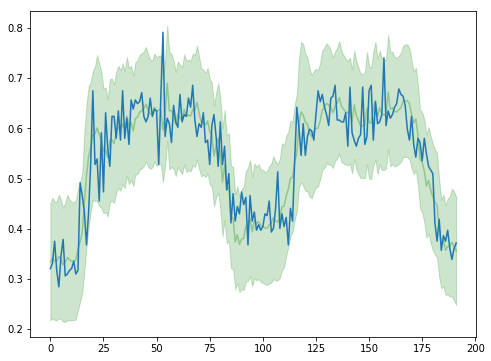

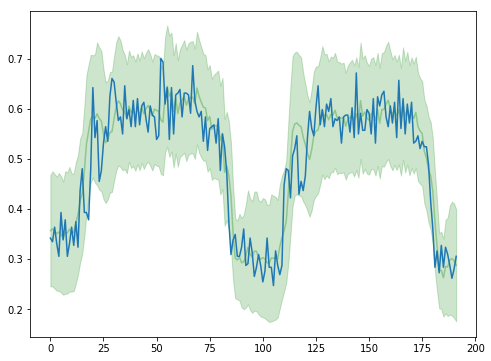

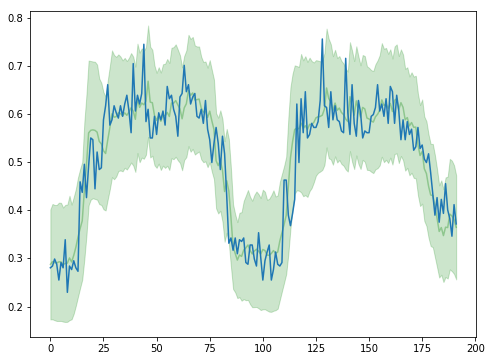

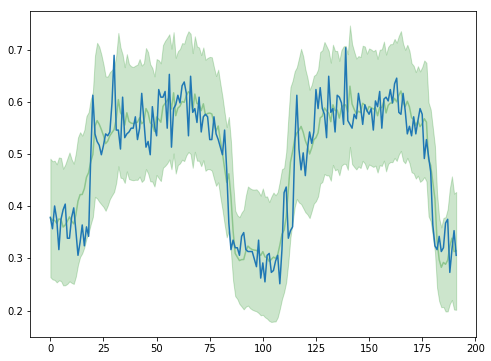

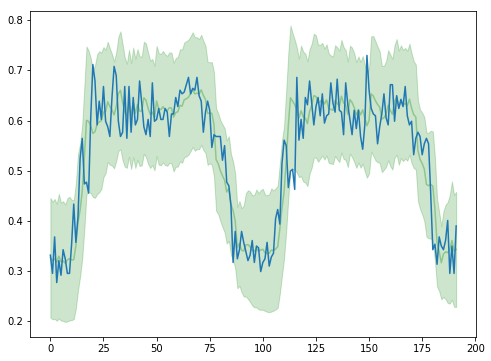

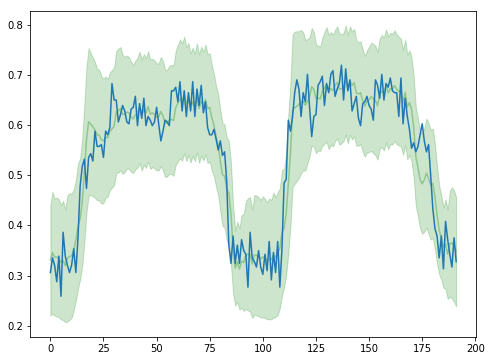

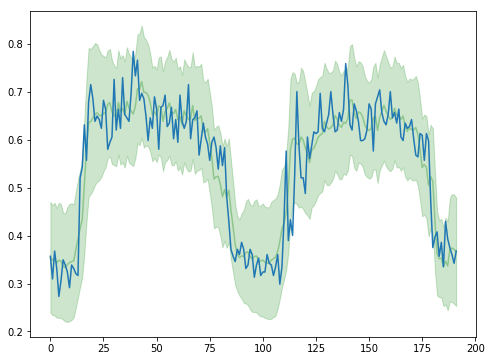

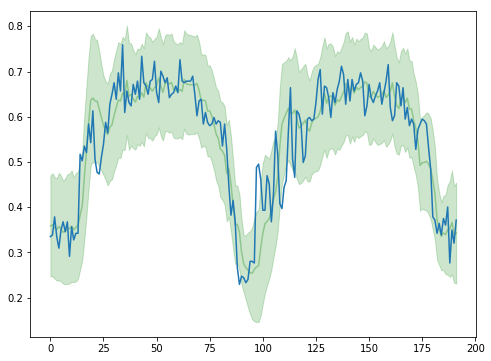

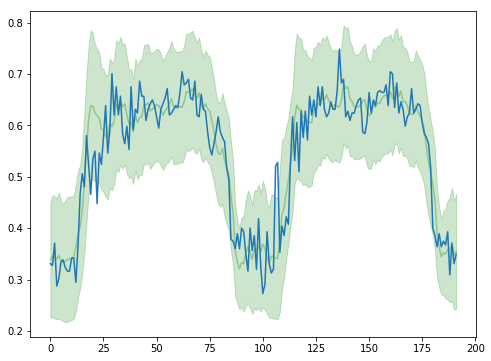

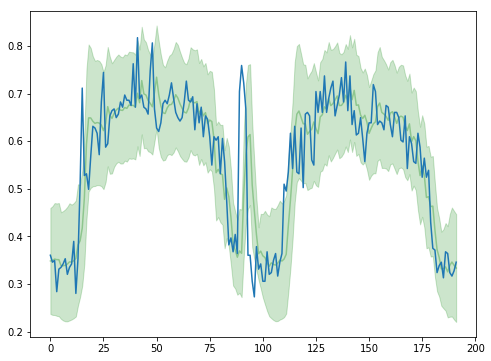

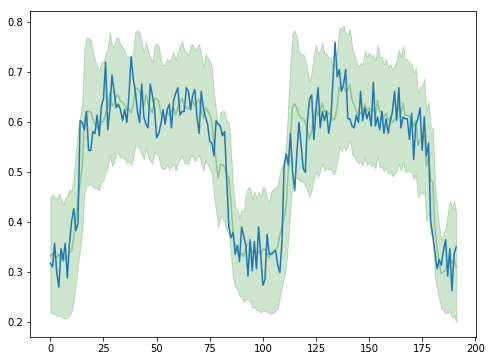

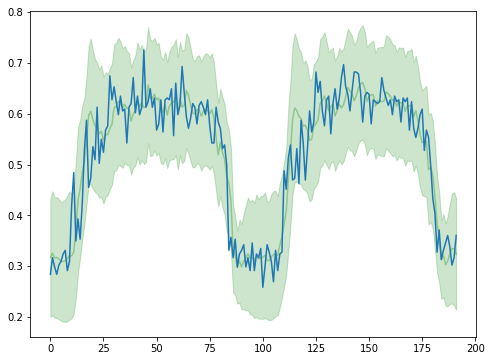

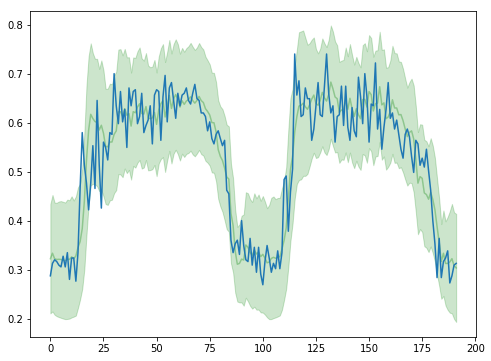

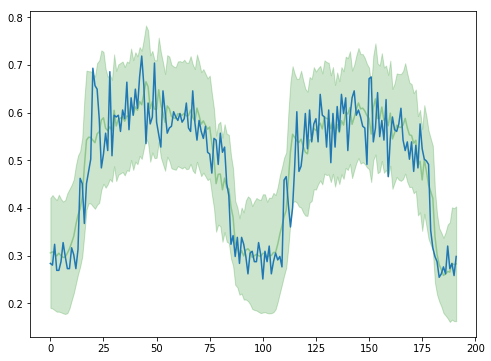

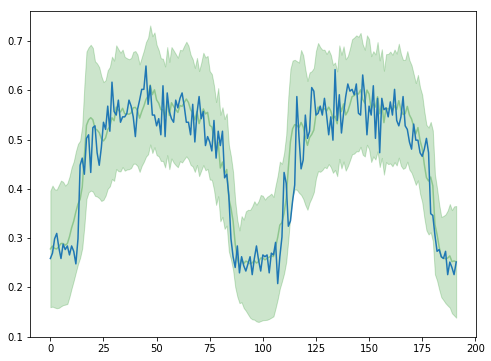

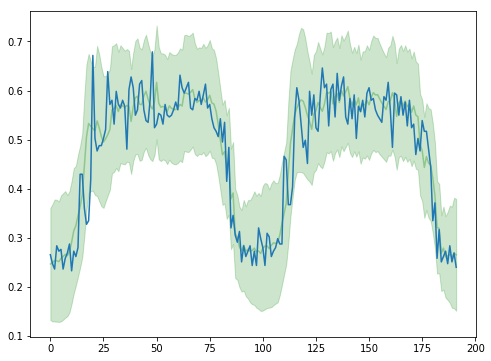

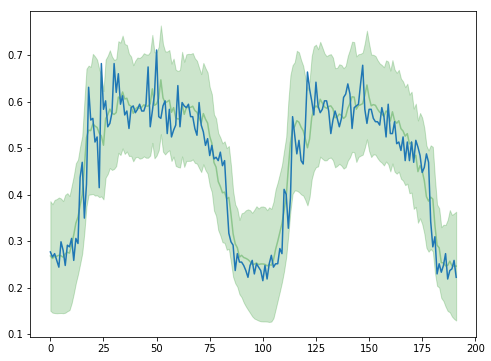

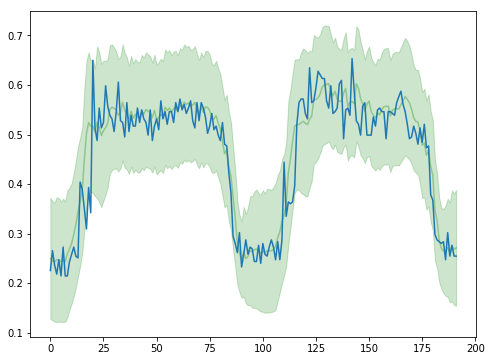

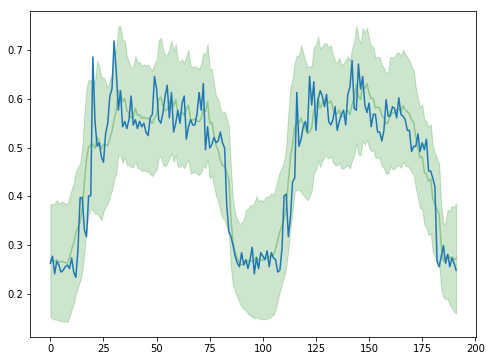

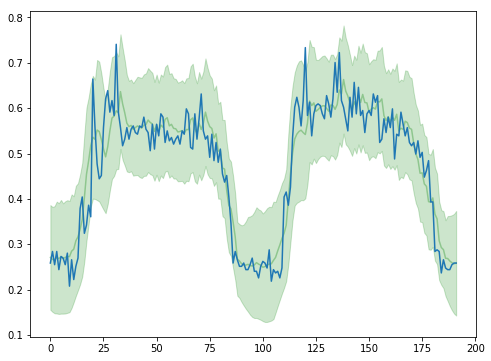

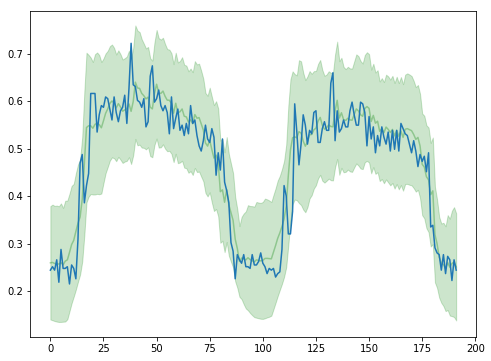

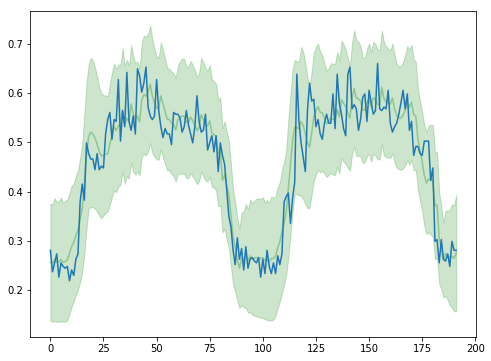

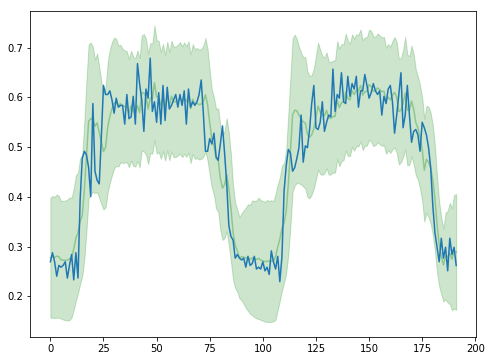

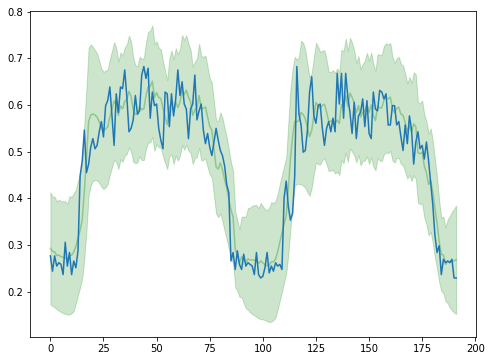

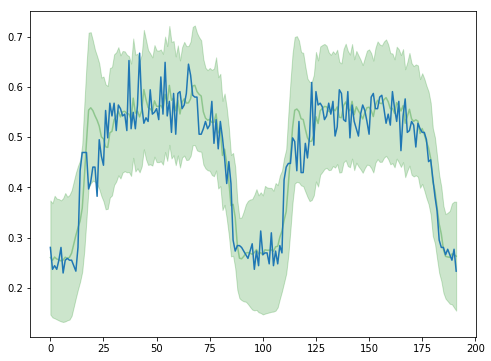

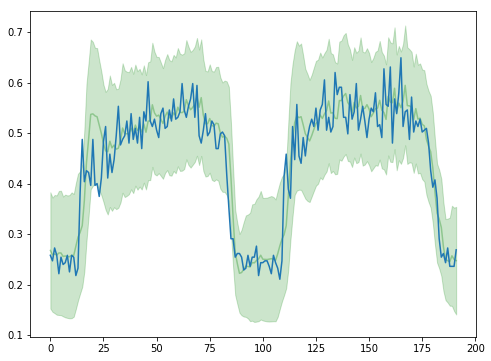

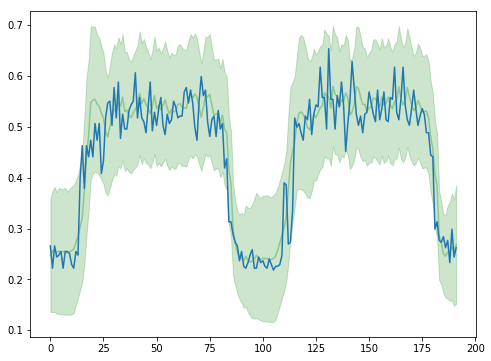

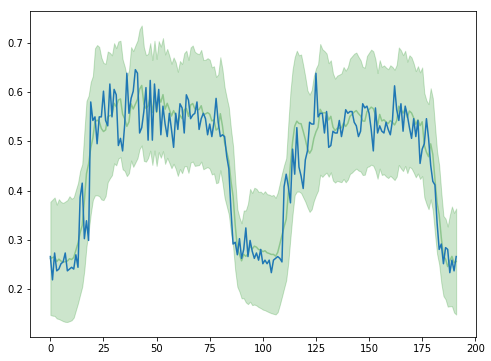

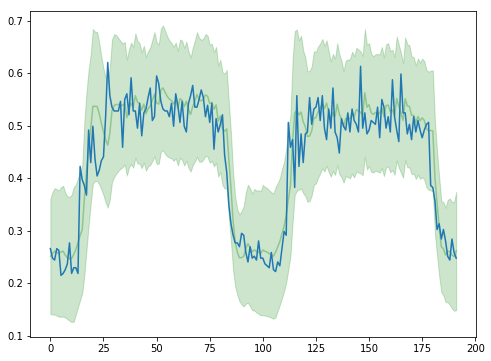

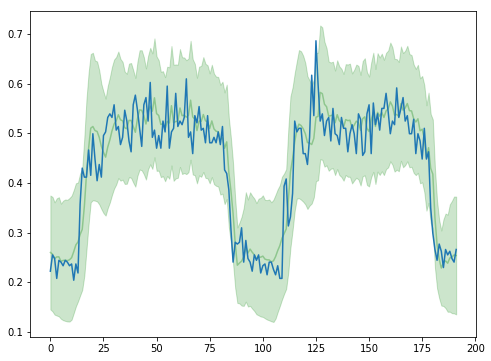

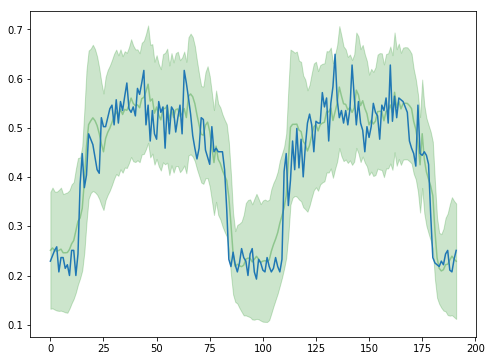

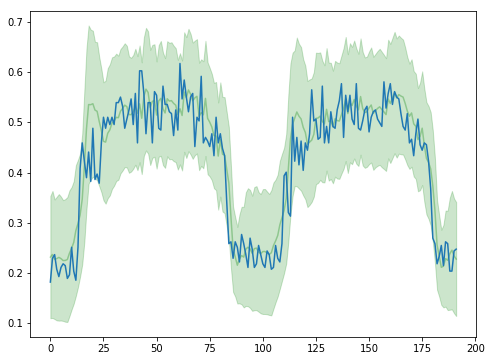

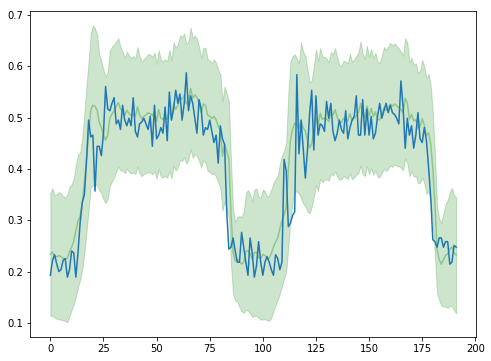

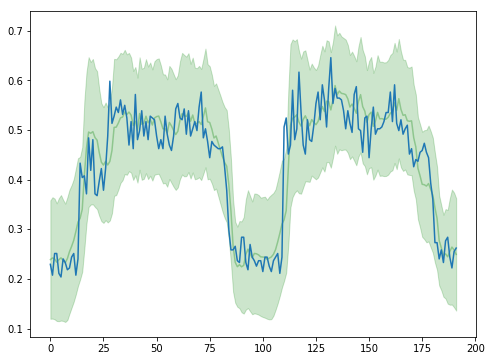

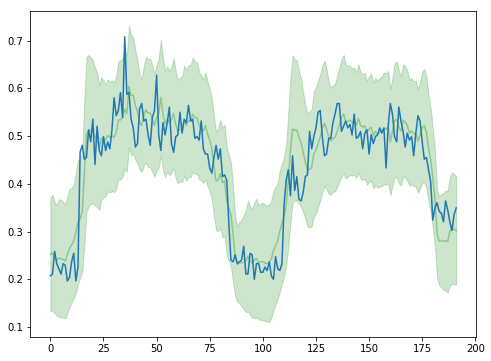

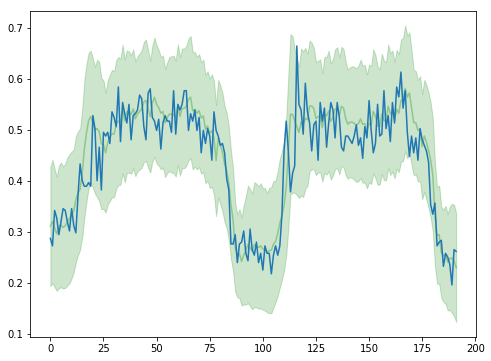

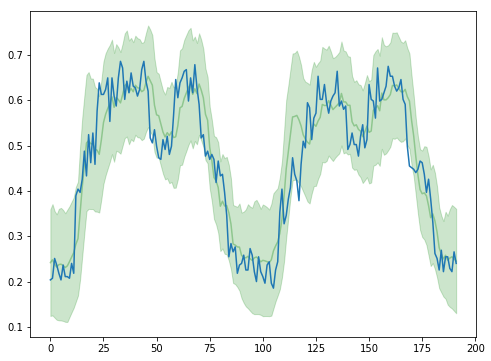

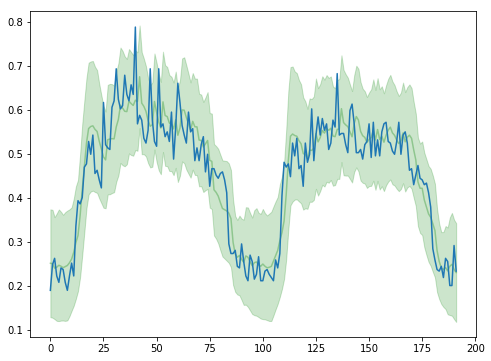

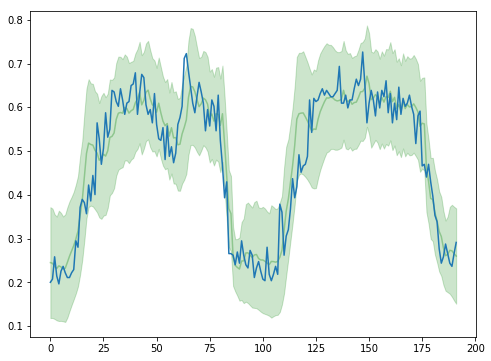

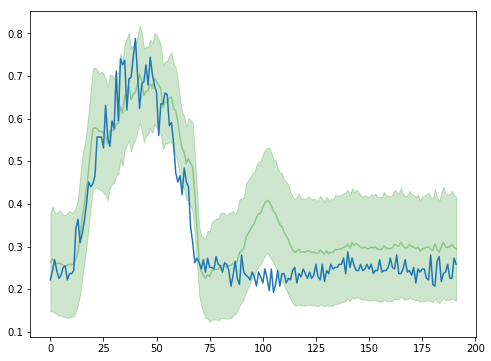

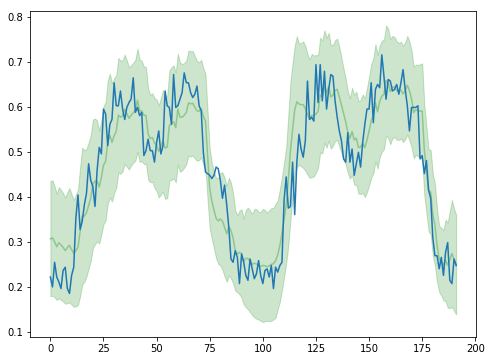

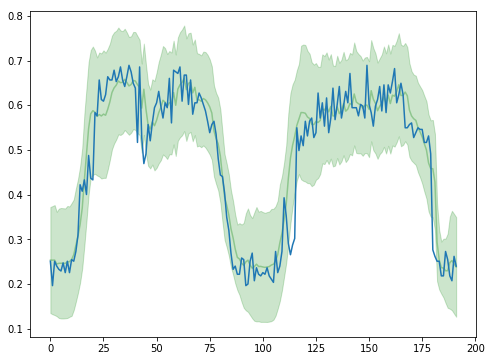

In [7]:
for i in range(0,len(y_test)- len(y_test)%192,192):
    show_interval(i)

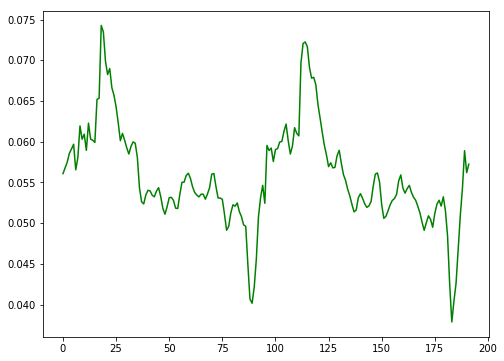

In [8]:
show_sigma(0,width=96*2)